---
layout: default
title: "Introduction to ML"
categories: linearRegression
permalink: /ML1/
order: 1
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
import seaborn as sns
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


/home/marnec/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# What is Machine Learning

Older, informal definition by Arthur Samuel:

> The field of study that gives computers the ability to learn without being explicitly programmed

More modern definition by Tom Mitchell: 

> A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$

Example: playing checkers.

* $E=$ the experience of playing many games of checkers;
* $T=$ the task of playing checkers;
* $P=$ the probability that the program will win the next game.

## Supervised and Un-supervised learning
A machine learning problem can belong to one of two broad categories:

* **Supervised learning**: We know how the correct output should look like
* **Unsupervised learning**: We don't know how the correct output should look like

## Supervised learning
We know how the correct output should look like. We have the intuition that there is a relationship between the input and the output and ML should identify this relationship.

Supervised learning problems belong in turn to two categories:

* **Regression problems**: Map input to continuous values
* **Classification problems**: Map input to discrete values

### Regression problems
We try to map input variables (features) to some continuous function. We could encode a problem as a regression problem even if output is not striclty continuous ($y \in \mathbb{R}$), provided that there are many possible output values.

Example:

> Given data about the size of houses on the real estate market, try to predict their price. 

Price as a function of size (<a href="#fig:scatter">Figure below</a>) is a psuedo-continuous output (prices in USD have sense only rounded to the second decimal figure), so this is a regression problem.

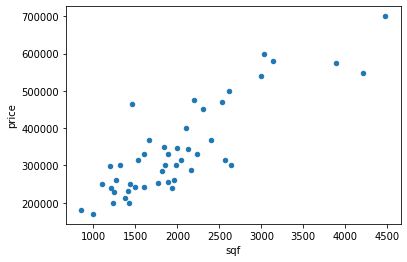

In [3]:
pd.read_csv('data/house_pricing.csv').plot.scatter(x='sqf', y='price');

<i id="fig:scatter">Price of houses in USD $(y)$ plotted against the living surface in square foots $(x)$ of a set of houses in Portland, Oregon</i>

### Classification problems
We try to map input variables into discrete categories. 

Example:
> Given a patient with a tumor, we have to predict whether the tumor is malignant or benign.

When trying to predict malignancy, a tumor can either be malignant (positive case, 1) or bening (negative case, 0). This situation is represented in the <a href="#fig:tumorsize">Figure below</a>

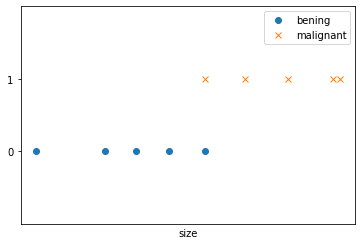

In [4]:
jitter = np.random.rand(5) * 0.3
x = np.linspace(0, 1, 5)
fig, ax = plt.subplots()
ax.plot(x+jitter, np.zeros(5), ls='none', marker='o', label='bening')
ax.plot(x+1+jitter[::-1], np.ones(5), ls='none', marker='x', label='malignant')
ax.set_xlabel('size')
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_ylim(-1, 2)
ax.legend();

<i id="fig:tumorsize">Measured size of tumors $(x)$ and their malignancy $(y)$ constrained to the values $0$ (bening) or $1$ (malignant)</i>

## Unsupervised learning
We don't know how the correct output should look like. Unsupervised learning allows us to approach problems with little or no idea of what our results should look like. Wit unsupervised learning we try to derive structure and patterns from data where we don't necessarily know the effect of the variables. We derive this structure by clustering the data based on relationships among the variables in the data.

With unsupervised learning there is no feedback based on the prediction results.

We can divide unsuperised learning in two categories:

* **Clustering**
* **Non-clustering**

### Clustering
Take a collection of 1,000,000 different genes, and find a way to automatically group these genes into groups that are somehow similar or related by different variables, such as lifespan, location, roles, and so on (<a href="#fig:genexpr">Figure below</a>).

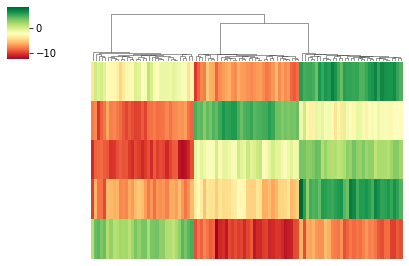

In [5]:
g = sns.clustermap(datasets.make_blobs(100, 5)[0].T, row_cluster=False, cmap='RdYlGn', figsize=(6, 4))
ax = g.ax_heatmap
ax.set_xticks([])
ax.set_yticks([]);

<i id="fig:genexpr">Heatmap of gene expression of 5 genes for 100 individuals, which are then clustered based on the similarity of the (gene-) expression profile (data is randomly generated).</i>

#### Difference between clustering and classification
In classification, we try to teach a learning algrithm to associate a set of features to the correct class after exposing it to many labeled examples. In clustering we don't know the correct label and we try measure if some data can be grouped toghther based on a feature or a combination of features. In <a href="#fig:iris">the figure below</a>, the same dataset is shown in its labeled (left) and unlabeled (right) versions.

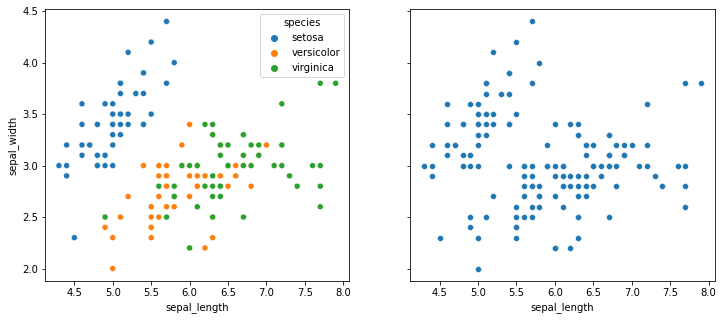

In [6]:
iris = sns.load_dataset('iris')
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=ax1);
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', legend=False, ax=ax2);

<i id="fig:iris">Labeled (left) and unlabeled (right) data on sepal length $(x)$ and width $(y)$</i>

### Non-clustering
The "Cocktail Party Algorithm" allows you to find structure in a chaotic environment. (i.e. identifying individual voices and music from a mesh of sounds at a cocktail party).